# Import Necessary packages

In [19]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

# Load Train and Test Data

In [20]:
((x_train, y_train),(x_test, y_test)) = mnist.load_data()

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [22]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0],-1))
x_train = x_train/255
x_test = x_test/255

In [23]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [24]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [25]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


# Defining network architecture using Keras

In [31]:
model = Sequential()
model.add(Dense(128,input_shape=(784,),activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

C:\Users\abhij\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the model using SGD with 11 epochs

In [27]:
sgd = SGD(0.01)
epochs = 11
model.compile(loss="categorical_crossentropy",optimizer=sgd, metrics=["accuracy"])
H=model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs, batch_size=128)

Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4929 - loss: 1.7778 - val_accuracy: 0.8487 - val_loss: 0.6125
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8600 - loss: 0.5595 - val_accuracy: 0.8920 - val_loss: 0.4075
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8895 - loss: 0.4068 - val_accuracy: 0.9048 - val_loss: 0.3427
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9019 - loss: 0.3523 - val_accuracy: 0.9135 - val_loss: 0.3103
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9104 - loss: 0.3217 - val_accuracy: 0.9169 - val_loss: 0.2884
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9142 - loss: 0.2970 - val_accuracy: 0.9213 - val_loss: 0.2746
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9214 - loss: 0.2803 - val_accuracy: 0.9270 - val_loss: 0.2616
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9239 - loss: 0.2661 - val_accuracy: 

# Evaluate Network

In [28]:
predictions = model.predict(x_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1),
      predictions.argmax(axis=1),
      target_names=[str(x) for x in lb.classes_]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.97      0.98      1135
           2       0.94      0.90      0.92      1032
           3       0.93      0.92      0.93      1010
           4       0.92      0.94      0.93       982
           5       0.94      0.90      0.92       892
           6       0.94      0.95      0.95       958
           7       0.94      0.93      0.93      1028
           8       0.88      0.93      0.91       974
           9       0.93      0.91      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.94      0.94     10000



# Plot training loss and accuracy

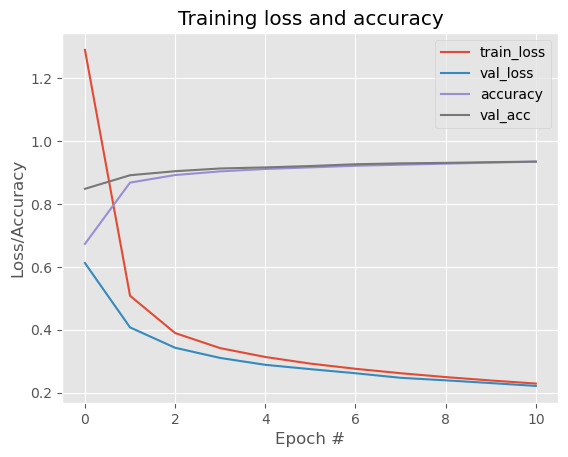

In [29]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0,epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,epochs),H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,epochs), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0,epochs),H.history["val_accuracy"], label="val_acc")

plt.title("Training loss and accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()